In [1]:
import pandas as pd
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
import re
from matplotlib_venn import venn2

sns.set_style("ticks")
warnings.simplefilter("ignore", category=FutureWarning)

In [2]:
df = pd.read_csv("../ptu_derep/derep_plasmids_lengths.tsv", sep="\t")
df.head()

,Plasmid,length
0,2088090014|GPIPI_16944593,5584
1,2088090014|GPIPI_16884012,8233
2,2088090014|GPIPI_17035422,5654
3,2088090014|GPIPI_17320127,5097
4,2088090014|GPIPI_16557027,6619


In [3]:
# fig, ax = plt.subplots()
# sns.set_style("white")
# sns.scatterplot(y=df["diff"], x=df.index, alpha=0.3, s=20)

# ax.set_title("Cluster size difference after contig rescue")
# ax.set_ylabel("Difference")
# ax.set_xlabel("Cluster number")
# ax.set_xticklabels([])

# # ax.set_yticks(np.arange(0, 20, 2))
# ax.set_xticks(np.arange(df.index[0], df.index[-1] + 1, step=500))

# sns.despine(fig)

---
## Open dataframes

In [4]:
df = pd.read_csv(
    "../ptu_derep/derep_plasmids_clusters_with_ptu_ids.tsv",
    sep="\t",
    header=None,
    index_col=0,
)

df.head()

,1,2
0,,
PTU-00000,3300056587|Ga0562382_00532,"3300056587|Ga0562382_00532,3300041809|Ga045567..."
PTU-00001,3300056791|Ga0562384_00281,"3300056791|Ga0562384_00281,3300054973|Ga049542..."
PTU-00002,3300046709|Ga0495471_0000157,"3300046709|Ga0495471_0000157,3300046788|Ga0495..."
PTU-00003,3300046559|Ga0495667_0000358,"3300046559|Ga0495667_0000358,3300036401|Ga0373..."
PTU-00004,3300056834|Ga0562381_00901,"3300056834|Ga0562381_00901,3300056587|Ga056238..."


In [5]:
with open("../ptu_derep/complete_plasmids_derep.txt") as f:
    complete_plasmids = f.read().splitlines()
    complete_plasmids = [
        i.split("|")[0] if "IMGPR" in i else i for i in complete_plasmids
    ]
complete_meta = [
    i
    for i in complete_plasmids
    if not any(j in i for j in ["IMGPR", "PLSDB", "Refsoil"])
]
complete_isolate = [
    i for i in complete_plasmids if any(j in i for j in ["IMGPR", "PLSDB", "Refsoil"])
]

In [6]:
# Number of ptus with at least one complete plasmid
df["has_complete"] = df[2].apply(
    lambda x: any([i in complete_plasmids for i in x.split(",")])
)
df["has_complete_meta"] = df[2].apply(
    lambda x: any([i in complete_meta for i in x.split(",")])
)
df["has_complete_isolate"] = df[2].apply(
    lambda x: any([i in complete_isolate for i in x.split(",")])
)

df["size"] = df[2].apply(lambda x: len(x.split(",")))
df.head()

,1,2,has_complete,has_complete_meta,has_complete_isolate,size
0,,,,,,
PTU-00000,3300056587|Ga0562382_00532,"3300056587|Ga0562382_00532,3300041809|Ga045567...",False,False,False,187
PTU-00001,3300056791|Ga0562384_00281,"3300056791|Ga0562384_00281,3300054973|Ga049542...",False,False,False,158
PTU-00002,3300046709|Ga0495471_0000157,"3300046709|Ga0495471_0000157,3300046788|Ga0495...",False,False,False,105
PTU-00003,3300046559|Ga0495667_0000358,"3300046559|Ga0495667_0000358,3300036401|Ga0373...",False,False,False,98
PTU-00004,3300056834|Ga0562381_00901,"3300056834|Ga0562381_00901,3300056587|Ga056238...",False,False,False,85


In [7]:
df[(df["has_complete"]) & (df["size"] > 1) & (~df["has_complete_isolate"])]

,1,2,has_complete,has_complete_meta,has_complete_isolate,size
0,,,,,,
PTU-00020,3300056791|Ga0562384_00873,"3300056791|Ga0562384_00873,3300048826|Ga049540...",True,True,False,55
PTU-00094,3300048762|Ga0494703_000498,"3300048762|Ga0494703_000498,3300050392|Ga05066...",True,True,False,28
PTU-00159,3300056870|Ga0562386_05510,"3300056870|Ga0562386_05510,3300046701|Ga049475...",True,True,False,21
PTU-00162,3300027857|Ga0209166_10000081,"3300027857|Ga0209166_10000081,3300031730|Ga030...",True,True,False,21
PTU-00178,3300046558|Ga0495633_0000078,"3300046558|Ga0495633_0000078,3300049459|Ga0495...",True,True,False,20
...,...,...,...,...,...,...
PTU-14965,3300048997|Ga0494380_0000058,"3300048997|Ga0494380_0000058,3300044809|Ga0467...",True,True,False,2
PTU-14972,3300057018|Ga0533267_000003,"3300057018|Ga0533267_000003,MGYA00645661|ERZ12...",True,True,False,2
PTU-15053,3300049207|Ga0498795_000601,"3300049207|Ga0498795_000601,3300046512|Ga04956...",True,True,False,2


In [8]:
df[
    (df["has_complete"])
    & (df["size"] > 1)
    & (df["has_complete_meta"])
    & (df["has_complete_isolate"])
]

,1,2,has_complete,has_complete_meta,has_complete_isolate,size
0,,,,,,
PTU-00073,3300035678|Ga0372948_0000013,"3300035678|Ga0372948_0000013,IMGPR_plasmid_282...",True,True,True,31
PTU-00200,Refsoil_NC_009508.1,"Refsoil_NC_009508.1,3300049203|Ga0498789_00003...",True,True,True,19
PTU-00695,IMGPR_plasmid_2765236086_000004|2765236086|276...,IMGPR_plasmid_2765236086_000004|2765236086|276...,True,True,True,10
PTU-01400,PLSDB_NZ_CP013266.1,"PLSDB_NZ_CP013266.1,IMGPR_plasmid_2675903423_0...",True,True,True,6
PTU-03504,PLSDB_NZ_CP049251.1,"PLSDB_NZ_CP049251.1,3300038557|Ga0436432_0194,...",True,True,True,4
PTU-03550,PLSDB_NZ_CP062118.1,"PLSDB_NZ_CP062118.1,3300048998|Ga0494381_00003...",True,True,True,4
PTU-04217,PLSDB_CP099719.1,"PLSDB_CP099719.1,3300046458|Ga0495591_000017,I...",True,True,True,3
PTU-04856,3300049173|Ga0494684_006724,"3300049173|Ga0494684_006724,3300049173|Ga04946...",True,True,True,3
PTU-06031,3300025735|Ga0207713_1000215,"3300025735|Ga0207713_1000215,3300009011|Ga0105...",True,True,True,3


In [9]:
df["ptu_length"] = df[2].apply(lambda x: len(x.split(",")))

In [10]:
df[df["ptu_length"] > 1].shape

(15207, 7)

In [11]:
df[df["ptu_length"] > 1]["ptu_length"].sum()

56223

In [12]:
print(df[df["ptu_length"] >= 2].shape[0])
print((df[df["ptu_length"] >= 2].shape[0] / df.shape[0]) * 100)

15207
26.555487645158475


In [13]:
def get_origin(row):
    origins = []
    for plasmid in row.split(","):
        if "IMGPR" in plasmid or "Refsoil" in plasmid or "PLSDB" in plasmid:
            origins.append("Isolate")
        else:
            origins.append("Meta")
    if all(i == "Isolate" for i in origins):
        return "Isolate"
    elif all(i == "Meta" for i in origins):
        return "Meta"
    else:
        return "Both"


df["origin"] = df[2].apply(get_origin)

In [14]:
df["origin"].value_counts()

Meta       51238
Isolate     5094
Both         933
Name: origin, dtype: int64

In [15]:
df["origin"].value_counts().values

array([51238,  5094,   933])

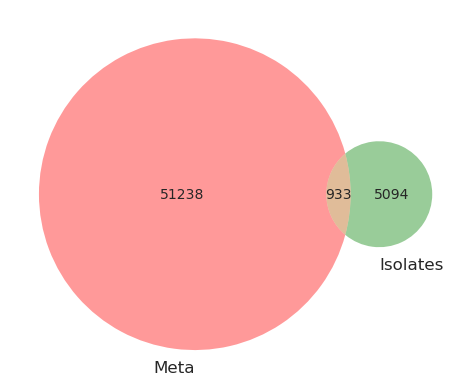

In [16]:
v = venn2(subsets=(df["origin"].value_counts().values), set_labels=("Meta", "Isolates"))

plt.savefig("../figures/ptu_origin_venn.pdf", bbox_inches="tight")

In [17]:
a = df[df["ptu_length"] > 1]["origin"].value_counts()
a = [a["Meta"], a["Isolate"], a["Both"]]
a

[13514, 760, 933]

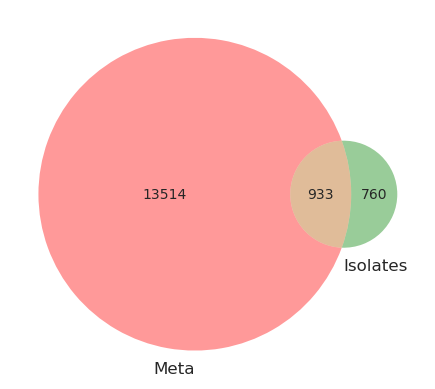

In [18]:
v = venn2(
    subsets=(a),
    set_labels=("Meta", "Isolates"),
)

plt.savefig("../figures/ptu_non-singleton_origin_venn.pdf", bbox_inches="tight")

In [19]:
df_ani = pl.read_csv("../ptu_derep/derep_plasmids_ani.tsv", separator="\t")

# df_ani.head()

In [20]:
# df_ani = (
#     df_ani.filter(pl.col("contig_1") != pl.col("contig_2"))
#     .with_columns(
#         cov=pl.max_horizontal(pl.col("qcov"), pl.col("tcov")),
#         joined_contigs=pl.concat_list(
#             [pl.col("contig_1"), pl.col("contig_2")]
#         ).list.sort(),
#     )
#     .with_columns(pl.col("joined_contigs").list.join(","))
#     .unique("joined_contigs")
# )

# df_ani.head()

In [21]:
df_ani = (
    df_ani.filter(pl.col("contig_1") != pl.col("contig_2"))
    .with_columns(pl.max_horizontal("qcov", "tcov").alias("cov"))
    .with_columns(
        pl.when(pl.col("contig_1") < pl.col("contig_2"))
        .then(pl.concat_str(["contig_1", "contig_2"], separator=","))
        .otherwise(pl.concat_str(["contig_2", "contig_1"], separator=","))
        .alias("joined_contigs")
    )
    .unique("joined_contigs")
)

df_ani.head()

contig_1,contig_2,num_alns,ani,qcov,tcov,cov,joined_contigs
str,str,i64,f64,f64,f64,f64,str
"""3300048772|Ga0…","""3300050117|Ga0…",1,0.762,0.0254,0.0128,0.0254,"""3300048772|Ga0…"
"""3300009011|Ga0…","""3300039817|Ga0…",5,0.8244,0.2519,0.6839,0.6839,"""3300009011|Ga0…"
"""3300028800|Ga0…","""3300032174|Ga0…",1,0.7813,0.282,0.4604,0.4604,"""3300028800|Ga0…"
"""3300029651|Ga0…","""Refsoil_NC_011…",2,0.7976,0.0218,0.0003,0.0218,"""3300029651|Ga0…"
"""3300040718|Ga0…","""3300050024|Ga0…",1,0.7788,0.3581,0.2753,0.3581,"""3300040718|Ga0…"


In [22]:
with open("../ptu_derep/complete_plasmids_derep.txt") as f:
    complete_plasmids = f.read().splitlines()

In [23]:
df_ani_complete_plasmids = df_ani.filter(
    (pl.col("contig_1").is_in(complete_plasmids))
    & (pl.col("contig_2").is_in(complete_plasmids))
)
df_ani_complete_plasmids.head()

contig_1,contig_2,num_alns,ani,qcov,tcov,cov,joined_contigs
str,str,i64,f64,f64,f64,f64,str
"""PLSDB_NZ_CP021…","""PLSDB_NZ_CP036…",5,0.8024,0.1089,0.1196,0.1196,"""PLSDB_NZ_CP021…"
"""PLSDB_NZ_CP036…","""PLSDB_NZ_CP010…",66,0.8846,0.1752,0.1558,0.1752,"""PLSDB_NZ_CP010…"
"""PLSDB_NZ_CP020…","""PLSDB_NZ_CP084…",27,0.8061,0.0493,0.0612,0.0612,"""PLSDB_NZ_CP020…"
"""PLSDB_NZ_CP014…","""PLSDB_NZ_CP036…",13,0.8185,0.0542,0.0234,0.0542,"""PLSDB_NZ_CP014…"
"""PLSDB_NZ_CP063…","""Refsoil_NC_007…",9,0.8343,0.0319,0.0196,0.0319,"""PLSDB_NZ_CP063…"


In [24]:
data_ani = df_ani.to_pandas()
data_df_ani_complete_plasmids = df_ani_complete_plasmids.to_pandas()

In [25]:
# sns.histplot(data_df_ani_complete_plasmids["cov"])
# plt.yscale("log")

In [26]:
# sns.jointplot(
#     data=data_df_ani_complete_plasmids[data_df_ani_complete_plasmids["cov"] > 0.2],
#     x="ani",
#     y="cov",
#     kind="hex",
#     bins="log",
# )
# plt.axhline(0.7, color="red", linestyle="--")
# plt.savefig("../figures/ani_cov_jointplot.pdf", bbox_inches="tight")

In [27]:
# sns.set_style("ticks")
# sns.jointplot(
#     data=data_ani[data_ani["cov"] > 0.2],
#     x="ani",
#     y="cov",
#     kind="hex",
#     bins="log",
#     joint_kws={"cmap": "viridis"},
# )
# plt.axhline(0.7, color="red", linestyle="--")
# cbar = plt.colorbar()
# cbar.set_label("Number of plasmid pairs")

In [28]:
# plt.hexbin(
#     data_ani[data_ani["cov"] > 0.2]["ani"],
#     data_ani[data_ani["cov"] > 0.2]["cov"],
#     cmap="viridis",
#     gridsize=40,
#     bins="log",
# )
# plt.xlabel("Average Nucleotide Identity")
# plt.ylabel("Aligned Fraction")
# plt.axhline(0.7, color="blue", linestyle="--")
# cbar = plt.colorbar()
# cbar.set_label("Plasmid pairs")

In [29]:
ptu_lookup = {}
for idx in df.index:
    for plasmid in df.loc[idx, 2].split(","):
        ptu_lookup[plasmid] = idx

In [30]:
df_ani = df_ani.with_columns(
    pl.col("contig_1").map_elements(lambda x: ptu_lookup.get(x)).alias("contig_1_ptu")
).with_columns(
    pl.col("contig_2").map_elements(lambda x: ptu_lookup.get(x)).alias("contig_2_ptu")
)

df_ani.head()

contig_1,contig_2,num_alns,ani,qcov,tcov,cov,joined_contigs,contig_1_ptu,contig_2_ptu
str,str,i64,f64,f64,f64,f64,str,str,str
"""3300048772|Ga0…","""3300050117|Ga0…",1,0.762,0.0254,0.0128,0.0254,"""3300048772|Ga0…","""PTU-01159""","""PTU-00000"""
"""3300009011|Ga0…","""3300039817|Ga0…",5,0.8244,0.2519,0.6839,0.6839,"""3300009011|Ga0…","""PTU-02681""","""PTU-16375"""
"""3300028800|Ga0…","""3300032174|Ga0…",1,0.7813,0.282,0.4604,0.4604,"""3300028800|Ga0…","""PTU-30978""","""PTU-00003"""
"""3300029651|Ga0…","""Refsoil_NC_011…",2,0.7976,0.0218,0.0003,0.0218,"""3300029651|Ga0…","""PTU-05295""","""PTU-12890"""
"""3300040718|Ga0…","""3300050024|Ga0…",1,0.7788,0.3581,0.2753,0.3581,"""3300040718|Ga0…","""PTU-03262""","""PTU-00017"""


In [42]:
df_ani.filter(
    (pl.col("contig_2") == "IMGPR_plasmid_2523533632_000003|2523533632|2523543592")
    & (pl.col("cov") > 0.9)
)

contig_1,contig_2,num_alns,ani,qcov,tcov,cov,joined_contigs,contig_1_ptu,contig_2_ptu
str,str,i64,f64,f64,f64,f64,str,str,str
"""3300049574|Ga0…","""IMGPR_plasmid_…",2,0.777,0.9613,0.0035,0.9613,"""3300049574|Ga0…","""PTU-00787""","""PTU-03001"""
"""IMGPR_plasmid_…","""IMGPR_plasmid_…",4,0.9894,0.9958,0.0264,0.9958,"""IMGPR_plasmid_…","""PTU-41348""","""PTU-03001"""
"""IMGPR_plasmid_…","""IMGPR_plasmid_…",5,0.9915,0.9637,0.0192,0.9637,"""IMGPR_plasmid_…","""PTU-41347""","""PTU-03001"""
"""IMGPR_plasmid_…","""IMGPR_plasmid_…",2,0.9845,0.9789,0.0163,0.9789,"""IMGPR_plasmid_…","""PTU-43359""","""PTU-03001"""
"""IMGPR_plasmid_…","""IMGPR_plasmid_…",19,0.9849,0.9565,0.1096,0.9565,"""IMGPR_plasmid_…","""PTU-14400""","""PTU-03001"""
"""IMGPR_plasmid_…","""IMGPR_plasmid_…",6,0.9835,0.9825,0.0446,0.9825,"""IMGPR_plasmid_…","""PTU-14399""","""PTU-03001"""
"""IMGPR_plasmid_…","""IMGPR_plasmid_…",12,0.9887,0.9715,0.1275,0.9715,"""IMGPR_plasmid_…","""PTU-03001""","""PTU-03001"""
"""IMGPR_plasmid_…","""IMGPR_plasmid_…",4,0.9827,0.9934,0.0347,0.9934,"""IMGPR_plasmid_…","""PTU-14429""","""PTU-03001"""
"""IMGPR_plasmid_…","""IMGPR_plasmid_…",16,0.9892,0.9665,0.1844,0.9665,"""IMGPR_plasmid_…","""PTU-03001""","""PTU-03001"""


In [32]:
with open("../nikos_questions/isolate_plasmids_50kb_up.txt") as f:
    isolate_plasmids = f.read().splitlines()

with open("../nikos_questions/complete_isolate_plasmids.txt") as f:
    complete_isolate_plasmids = f.read().splitlines()


In [44]:
df_ani.filter(
    (
        pl.col("contig_1").is_in(complete_isolate_plasmids)
        | (pl.col("contig_2").is_in(complete_isolate_plasmids))
    )
    & (pl.col("cov") == 1)
).with_columns(
    pl.when(pl.col("contig_1").str.contains("IMGPR|Refsoil|PLSDB"))
    .then(pl.lit("isolate"))
    .otherwise(pl.lit("meta"))
    .alias("contig_1_origin")
).with_columns(
    pl.when(pl.col("contig_2").str.contains("IMGPR|Refsoil|PLSDB"))
    .then(pl.lit("isolate"))
    .otherwise(pl.lit("meta"))
    .alias("contig_2_origin")
).filter(
    (pl.col("contig_1_origin") == "meta") | (pl.col("contig_2_origin") == "meta")
).write_csv(
    "../nikos_questions/isolate_plasmids_cov_1.0.tsv",
    separator="\t",
)

In [40]:
filtered_df_ani = df_ani.filter(
    (pl.col("contig_1") != pl.col("contig_2"))
    & (pl.col("contig_1_ptu") == pl.col("contig_2_ptu"))
    & ((pl.col("ani") != 1) & (pl.col("tcov") != 1) & (pl.col("qcov") != 1))
)

filtered_df_ani.head()

contig_1,contig_2,num_alns,ani,qcov,tcov,cov,joined_contigs,contig_1_ptu,contig_2_ptu
str,str,i64,f64,f64,f64,f64,str,str,str
"""3300048810|Ga0…","""3300050345|Ga0…",1,0.8546,0.7252,0.9478,0.9478,"""3300048810|Ga0…","""PTU-00000""","""PTU-00000"""
"""3300047642|Ga0…","""3300050035|Ga0…",1,0.9943,0.8814,0.6999,0.8814,"""3300047642|Ga0…","""PTU-05106""","""PTU-05106"""
"""3300047648|Ga0…","""3300047656|Ga0…",2,0.9999,0.807,0.9844,0.9844,"""3300047648|Ga0…","""PTU-03736""","""PTU-03736"""
"""3300046782|Ga0…","""3300060913|Ga0…",2,0.9008,0.6461,0.8965,0.8965,"""3300046782|Ga0…","""PTU-00189""","""PTU-00189"""
"""3300010367|Ga0…","""3300049184|Ga0…",2,0.8303,0.8791,0.1623,0.8791,"""3300010367|Ga0…","""PTU-03179""","""PTU-03179"""


In [31]:
# a = filtered_df_ani.filter(
#     (pl.col("contig_1").is_in(complete_plasmids))
#     & (pl.col("contig_2").is_in(complete_plasmids))
# )

In [32]:
# a.filter(pl.col("cov") < 0.7).shape[0] / a.shape[0]

In [33]:
# sns.jointplot(
#     data=a.to_pandas(),
#     x="ani",
#     y="cov",
#     kind="hex",
#     marginal_kws=dict(bins=30, fill=True),
# )
# plt.axhline(0.7, color="red", linestyle="--")
# plt.savefig("../figures/ani_cov_jointplot_filtered.pdf", bbox_inches="tight")

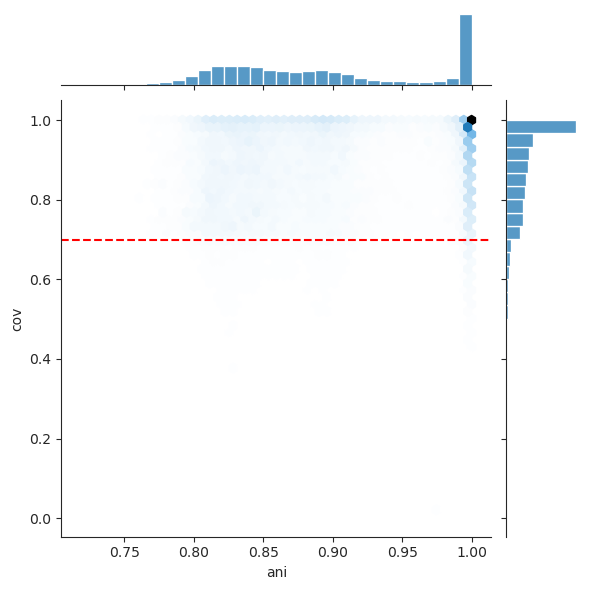

In [34]:
sns.jointplot(
    data=filtered_df_ani.to_pandas(),
    x="ani",
    y="cov",
    kind="hex",
    marginal_kws=dict(bins=30, fill=True),
)
plt.axhline(0.7, color="red", linestyle="--")
plt.savefig("../figures/ani_cov_jointplot_filtered.pdf", bbox_inches="tight")

In [35]:
mean_ani_ptu = (
    filtered_df_ani.group_by("contig_1_ptu")
    .agg(
        pl.col("ani").mean().alias("mean_ani"),
        pl.col("cov").mean().alias("mean_cov"),
        pl.col("contig_1_ptu").count().alias("n"),
    )
    .to_pandas()
)

# median_ani_ptu =(filtered_df_ani.group_by("contig_1_ptu")
#     .agg(pl.col("ani").median().alias("median_ani"))
#     .to_pandas()
# )

mean_ani_ptu.head()

,contig_1_ptu,mean_ani,mean_cov,n
0,PTU-03273,0.987600,0.938400,5
1,PTU-06126,0.978500,0.993800,2
2,PTU-14844,0.991100,0.865000,1
3,PTU-06475,0.776600,0.758200,2
4,PTU-00647,0.999053,0.823979,19


In [36]:
# plt.hexbin(
#     mean_ani_ptu["mean_ani"],
#     mean_ani_ptu["mean_cov"],
#     cmap="viridis",
#     gridsize=40,
#     bins="log",
# )
# plt.xlabel("Average Nucleotide Identity")
# plt.ylabel("Aligned Fraction")

# cbar = plt.colorbar()
# cbar.set_label("pOTUs")

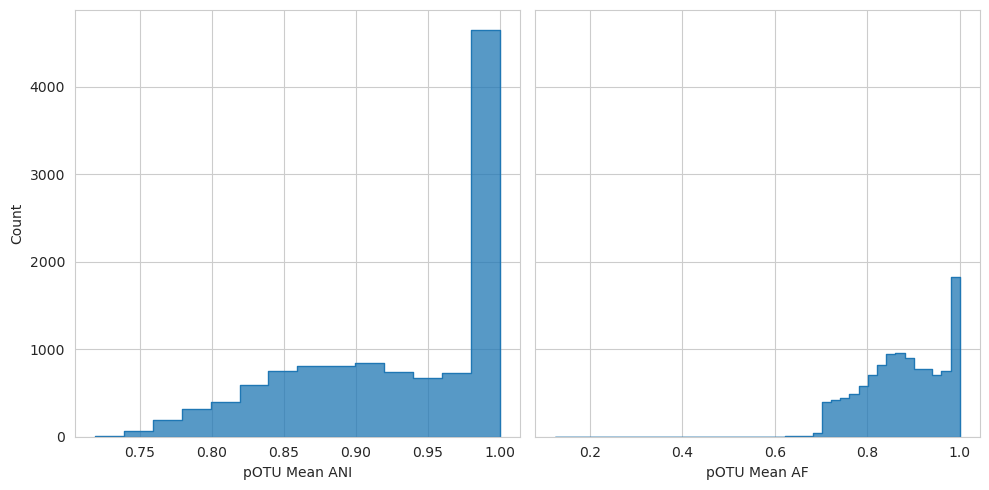

In [37]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(ncols=2, figsize=(10, 5), sharey=True)

sns.histplot(mean_ani_ptu, x="mean_ani", ax=axes[0], binwidth=0.02, element="step")
sns.histplot(mean_ani_ptu, x="mean_cov", ax=axes[1], binwidth=0.02, element="step")

axes[0].set_xlabel("pOTU Mean ANI")
axes[1].set_xlabel("pOTU Mean AF")
plt.tight_layout()
fig.savefig("../figures/ptu_mean_ani.pdf", bbox_inches="tight")

In [38]:
print(
    f"There are {mean_ani_ptu[mean_ani_ptu['mean_ani'] >= 0.90].shape[0]} PTUs with mean ANI >= 0.90 ({mean_ani_ptu[mean_ani_ptu['mean_ani'] < 0.95].shape[0]} PTUs with mean ANI < 0.95). The min ANI for a PTU is {mean_ani_ptu['mean_ani'].min()}, for {mean_ani_ptu[mean_ani_ptu['mean_ani'] == mean_ani_ptu['mean_ani'].min()]['contig_1_ptu'].values[0]}"
)

There are 7619 PTUs with mean ANI >= 0.90 (5885 PTUs with mean ANI < 0.95). The min ANI for a PTU is 0.7188, for PTU-13175


In [40]:
7619 / mean_ani_ptu.shape[0]


0.6584564860426929

In [39]:
with open("../crispr_search/meta_spacers/ptus_less_95_ani.txt", "w") as f:
    for ptu in mean_ani_ptu[mean_ani_ptu["mean_ani"] < 0.95]["contig_1_ptu"].to_list():
        f.write(f"{ptu}\n")

---
## Start analysis

In [42]:
size_dict = {}
for idx, i in enumerate(df[2]):
    cluster = i.split(",")
    matches = re.findall("IMGPR", i)
    size_dict[idx] = [len(matches), len(cluster) - len(matches), len(cluster)]

In [43]:
cluster_stats = pd.DataFrame.from_dict(
    size_dict, orient="index", columns=["isolate_count", "meta_count", "cluster_size"]
)
cluster_stats.head()

,isolate_count,meta_count,cluster_size
0,0,187,187
1,0,158,158
2,0,105,105
3,0,98,98
4,0,85,85


<Axes: ylabel='cluster_size'>

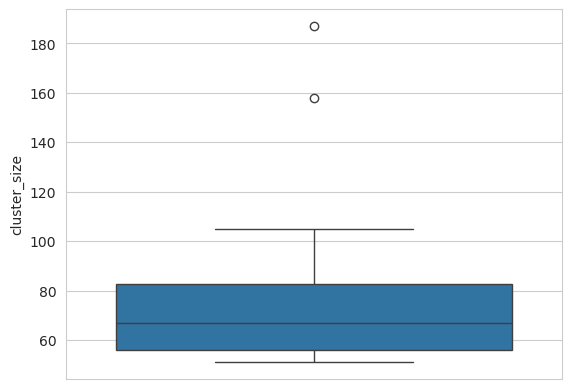

In [44]:
fig, ax = plt.subplots()
sns.boxplot(data=cluster_stats.query("cluster_size > 50"), y="cluster_size")
# ax.set_ylim(1,20)

In [45]:
cluster_stats[cluster_stats["cluster_size"] > 1]

,isolate_count,meta_count,cluster_size
0,0,187,187
1,0,158,158
2,0,105,105
3,0,98,98
4,0,85,85
...,...,...,...
15202,0,2,2
15203,0,2,2
15204,1,1,2
15205,0,2,2


In [46]:
cluster_stats[
    (cluster_stats["cluster_size"] > 1)
    & (cluster_stats["meta_count"] > 0)
    & (cluster_stats["isolate_count"] == 0)
]["cluster_size"].sum()

50216

---

Cluster stats

In [47]:
# Intersection
cluster_stats[
    (cluster_stats["isolate_count"] > 0) & (cluster_stats["meta_count"] > 0)
].shape

(1038, 3)

In [48]:
# Isolates
cluster_stats[
    (cluster_stats["isolate_count"] > 0) & (cluster_stats["meta_count"] == 0)
].shape

(4109, 3)

In [49]:
# Meta
cluster_stats[(cluster_stats["meta_count"] > 0)].shape

(53156, 3)

In [50]:
cluster_stats[
    (cluster_stats["isolate_count"] == 0) & (cluster_stats["meta_count"] >= 1)
].shape

(52118, 3)

In [51]:
cluster_stats[
    (cluster_stats["isolate_count"] >= 1) & (cluster_stats["meta_count"] >= 1)
].shape

(1038, 3)

Hosts

In [52]:
cluster_stats

,isolate_count,meta_count,cluster_size
0,0,187,187
1,0,158,158
2,0,105,105
3,0,98,98
4,0,85,85
...,...,...,...
57260,0,1,1
57261,0,1,1
57262,0,1,1
57263,0,1,1
